### DEMSLV12  

# Convergence rates for different NLP methods

This demo shows how quickly different NLP methods converge to a solution.  In particular, we look for the root of 
$$f(x) = \exp(x) - 1$$

starting with a guess $x_0 = 2$. The true solution is $x = 0$.

In [1]:
from demos.setup import demo, np, plt
from compecon import NLP
%matplotlib inline

### Define a NLP problem

Here, we set convergence tolerance `tol=1e-20` and the option `all_x=True` to record all values taken by $x$ from the initial guess `x0=2.0` to the final solution. These values will be stored in the `.x_sequence` attribute.

We also define `err` to compute the base-10 logarithm of the error (the gap between the current iteration and the solution).

In [2]:
A = NLP(lambda x: (np.exp(x)-1, np.exp(x)), all_x=True, tol=1e-20)
err = lambda z: np.log10(np.abs(z)).flatten()
x0 = 2.0

### Solve the problem

#### * Using Newton's method

In [3]:
A.newton(x0)
err_newton = err(A.x_sequence)

#### * Using Broyden's method

In [4]:
A.broyden(x0)
err_broyden = err(A.x_sequence)

#### * Using function iteration

This method finds a zero of $f(x)$ by looking for a fixpoint of $g(x) = x-f(x)$.

In [5]:
A.funcit(x0)
err_funcit = err(A.x_sequence)

###  Plot results

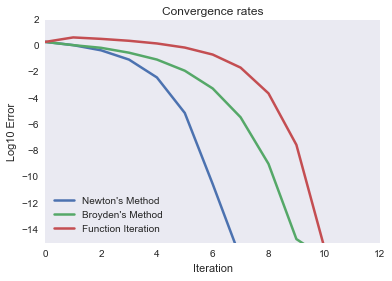

In [6]:
demo.figure('Convergence rates', 'Iteration', 'Log10 Error',
           [0, 12], [-15, 2])
plt.plot(err_newton, label="Newton's Method")
plt.plot(err_broyden, label="Broyden's Method")
plt.plot(err_funcit, label="Function Iteration")
plt.legend(loc='lower left')
plt.show()